## Aman Sherjada Khan
### CIN: PIT/JAN24/3170
### Machine Learning

#### Task 01: Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data = pd.read_csv("housing.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
data.size

118260

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Select relevant columns from your dataset
selected_columns = ['LotArea','GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice']
data_subset = data[selected_columns]

In [7]:
data_subset

,LotArea,GrLivArea,BedroomAbvGr,FullBath,HalfBath,SalePrice
0,8450,1710,3,2,1,208500
1,9600,1262,3,2,0,181500
2,11250,1786,3,2,1,223500
3,9550,1717,3,1,0,140000
4,14260,2198,4,2,1,250000
...,...,...,...,...,...,...
1455,7917,1647,3,2,1,175000
1456,13175,2073,3,2,0,210000
1457,9042,2340,4,2,0,266500
1458,9717,1078,2,1,0,142125


In [8]:
data_subset.duplicated().sum()

1

In [9]:
data_subset.drop_duplicates()

,LotArea,GrLivArea,BedroomAbvGr,FullBath,HalfBath,SalePrice
0,8450,1710,3,2,1,208500
1,9600,1262,3,2,0,181500
2,11250,1786,3,2,1,223500
3,9550,1717,3,1,0,140000
4,14260,2198,4,2,1,250000
...,...,...,...,...,...,...
1455,7917,1647,3,2,1,175000
1456,13175,2073,3,2,0,210000
1457,9042,2340,4,2,0,266500
1458,9717,1078,2,1,0,142125


In [10]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   GrLivArea     1460 non-null   int64
 2   BedroomAbvGr  1460 non-null   int64
 3   FullBath      1460 non-null   int64
 4   HalfBath      1460 non-null   int64
 5   SalePrice     1460 non-null   int64
dtypes: int64(6)
memory usage: 68.6 KB


In [11]:
data_subset.corr()

,LotArea,GrLivArea,BedroomAbvGr,FullBath,HalfBath,SalePrice
LotArea,1.000000,0.263116,0.119690,0.126031,0.014259,0.263843
GrLivArea,0.263116,1.000000,0.521270,0.630012,0.415772,0.708624
BedroomAbvGr,0.119690,0.521270,1.000000,0.363252,0.226651,0.168213
FullBath,0.126031,0.630012,0.363252,1.000000,0.136381,0.560664
HalfBath,0.014259,0.415772,0.226651,0.136381,1.000000,0.284108
SalePrice,0.263843,0.708624,0.168213,0.560664,0.284108,1.000000


In [12]:
data_subset.describe()

,LotArea,GrLivArea,BedroomAbvGr,FullBath,HalfBath,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,2.866438,1.565068,0.382877,180921.195890
std,9981.264932,525.480383,0.815778,0.550916,0.502885,79442.502883
min,1300.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,1129.500000,2.000000,1.000000,0.000000,129975.000000
50%,9478.500000,1464.000000,3.000000,2.000000,0.000000,163000.000000
75%,11601.500000,1776.750000,3.000000,2.000000,1.000000,214000.000000
max,215245.000000,5642.000000,8.000000,3.000000,2.000000,755000.000000


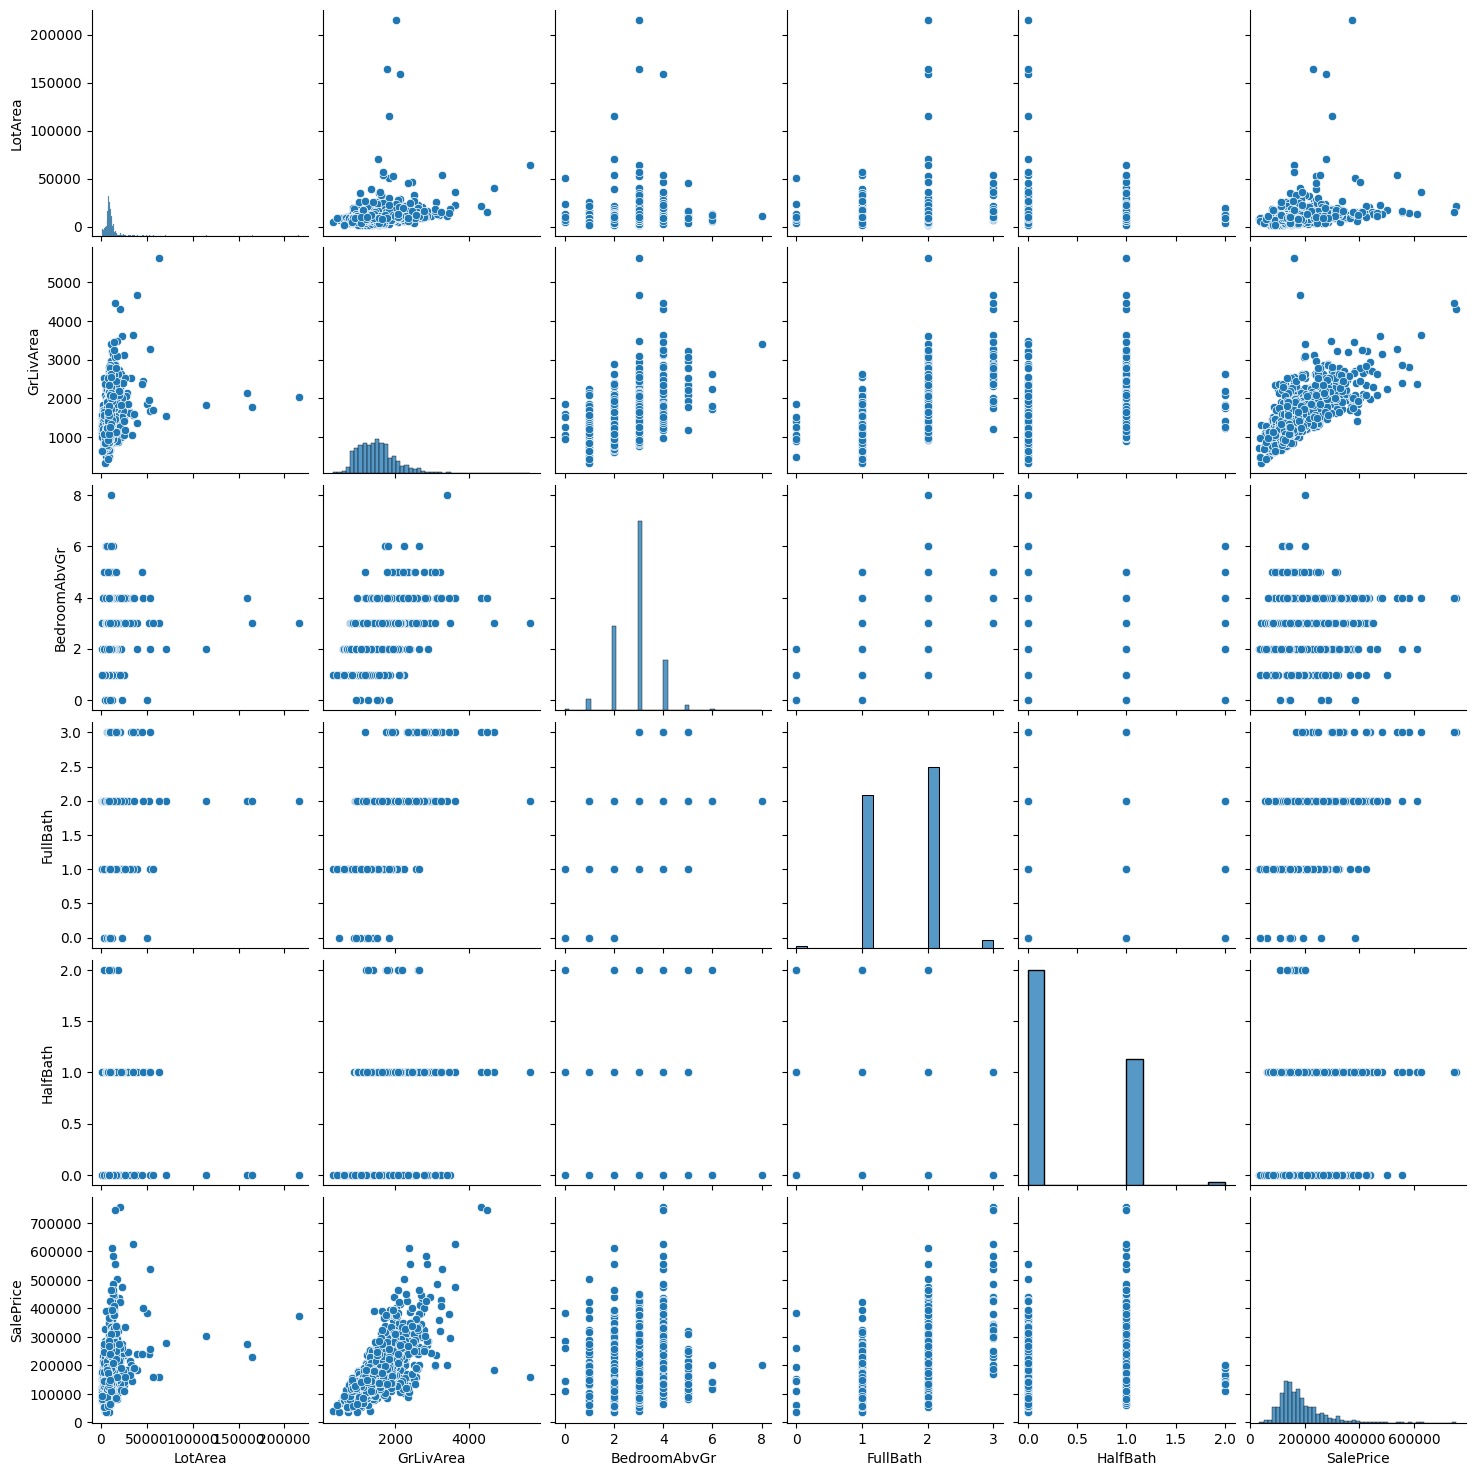

In [13]:
sns.pairplot(data_subset)

<Axes: >

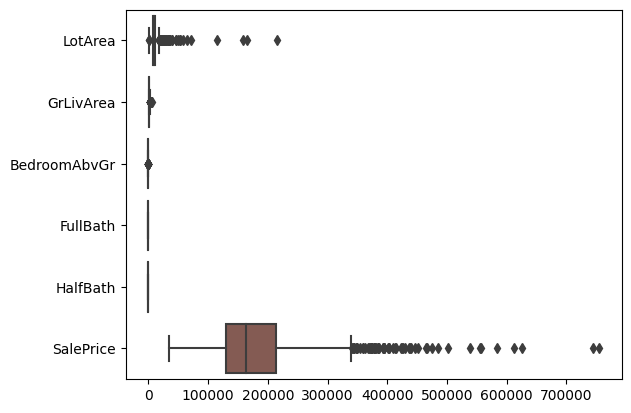

In [14]:
sns.boxplot(data_subset, orient="h")

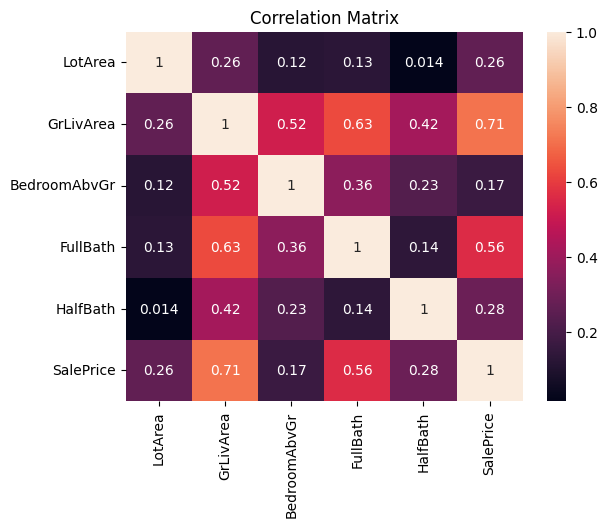

In [15]:
correlation_matrix = data_subset.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [16]:
x = data_subset.iloc[:,:-1]
y = data_subset["SalePrice"]

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [18]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)
print(f"Train Score = {lr.score(xtrain, ytrain)}")
print(f"Test Score = {lr.score(xtest, ytest)}")

Train Score = 0.5745730412317127
Test Score = 0.6369374488098611


In [19]:
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2784808201.241939
R-squared: 0.6369374488098611


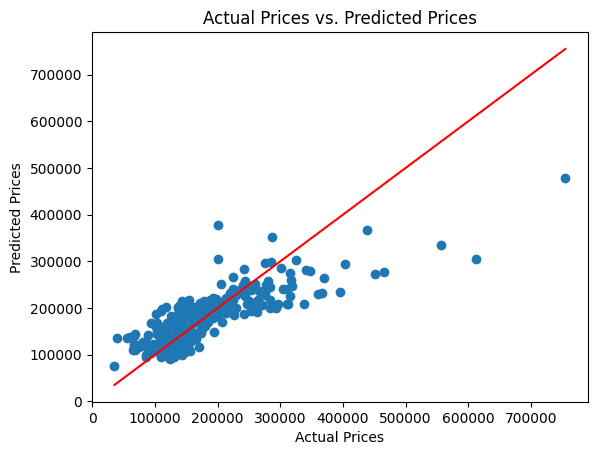

In [20]:
plt.scatter(ytest, ypred)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', linestyle='-')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

In [21]:
data1=pd.read_csv("test.csv")
data1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [22]:
test =  data1[['LotArea','GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']] 

In [23]:
test.head()

,LotArea,GrLivArea,BedroomAbvGr,FullBath,HalfBath
0,11622,896,2,1,0
1,14267,1329,3,1,1
2,13830,1629,3,2,1
3,9978,1604,3,2,1
4,5005,1280,2,2,0


In [24]:
prediction = lr.predict(test)

In [25]:
test['Predicted Price'] = prediction
test

,LotArea,GrLivArea,BedroomAbvGr,FullBath,HalfBath,Predicted Price
0,11622,896,2,1,0,123941.683601
1,14267,1329,3,1,1,147299.587668
2,13830,1629,3,2,1,208060.888381
3,9978,1604,3,2,1,202965.429564
4,5005,1280,2,2,0,188470.240913
...,...,...,...,...,...,...
1454,1936,1092,3,1,1,115883.807340
1455,1894,1092,3,1,1,115854.478543
1456,20000,1224,4,1,0,108302.483670
1457,10441,970,3,1,0,103712.066491


In [26]:
test['Predicted Price'].mean()

177596.21556924132

In [27]:
data['SalePrice'].mean()

180921.19589041095